### Importing libraries

In [47]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### loading the dataset

In [48]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

Data is by default splitted in training and testing set

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
X_test.shape

(10000, 28, 28)

In [51]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

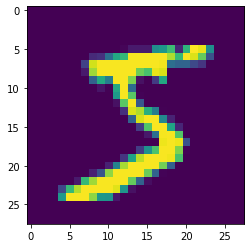

In [52]:
plt.imshow(X_train[0])

In [53]:
y_train[0]

5

In [54]:
X_train=X_train/255
X_test=X_test/255

In [55]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [56]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

flattening the image from 28*28 to 784 (can also be done by keras.layers.flatten)

In [57]:
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

### Building a neural network

In [58]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.4698 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 939us/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9253


##### There is no hidden layer in this model

### Evaluation

In [59]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2724 - accuracy: 0.9258


[0.2723720967769623, 0.9258000254631042]

### Prediction

In [60]:
model.predict(X_test_flattened)

array([[3.73646319e-02, 4.08860700e-07, 4.94175255e-02, ...,
        9.99789119e-01, 1.26875848e-01, 6.99839473e-01],
       [5.72297990e-01, 5.75399399e-03, 9.99407768e-01, ...,
        1.86359001e-12, 2.65168190e-01, 2.89773605e-09],
       [4.21643257e-04, 9.91844773e-01, 6.27606630e-01, ...,
        1.45550936e-01, 3.94612342e-01, 3.65788639e-02],
       ...,
       [6.73063460e-06, 5.21585343e-06, 7.22795725e-04, ...,
        2.55366892e-01, 6.65577054e-01, 7.86809206e-01],
       [2.08079815e-04, 2.61306763e-04, 1.16293777e-04, ...,
        3.72473296e-05, 6.89471960e-01, 9.29524540e-05],
       [3.52556407e-02, 4.72211270e-10, 1.10004455e-01, ...,
        2.14720615e-08, 4.05937433e-04, 1.34756681e-06]], dtype=float32)

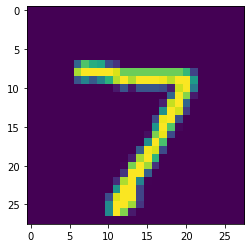

In [61]:
plt.imshow(X_test[0])

In [62]:
y_pred=model.predict(X_test_flattened)

In [63]:
y_pred[0]

array([3.7364632e-02, 4.0886070e-07, 4.9417526e-02, 9.5191061e-01,
       3.6591887e-03, 1.3559440e-01, 1.8737770e-06, 9.9978912e-01,
       1.2687585e-01, 6.9983947e-01], dtype=float32)

In [64]:
#finding maximum value from the above array
np.argmax(y_pred[0])

7

In [65]:
y_predicted_labels=[np.argmax(i) for i in y_pred]
y_predicted_labels[0]

7

### Confusion matrix

In [66]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [67]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  11,    9,  909,   17,   11,    2,   13,   11,   45,    4],
       [   6,    0,   14,  919,    1,   22,    2,   12,   29,    5],
       [   2,    1,    2,    1,  918,    0,   11,    4,   10,   33],
       [  13,    3,    2,   28,   11,  763,   19,    7,   38,    8],
       [  16,    3,    4,    1,    7,    8,  914,    2,    3,    0],
       [   2,    5,   20,    5,    9,    0,    0,  953,    4,   30],
       [  10,    8,    5,   16,    9,   16,   10,   12,  882,    6],
       [  11,    7,    1,    8,   25,    6,    0,   21,    8,  922]])>

Text(69.0, 0.5, 'True values')

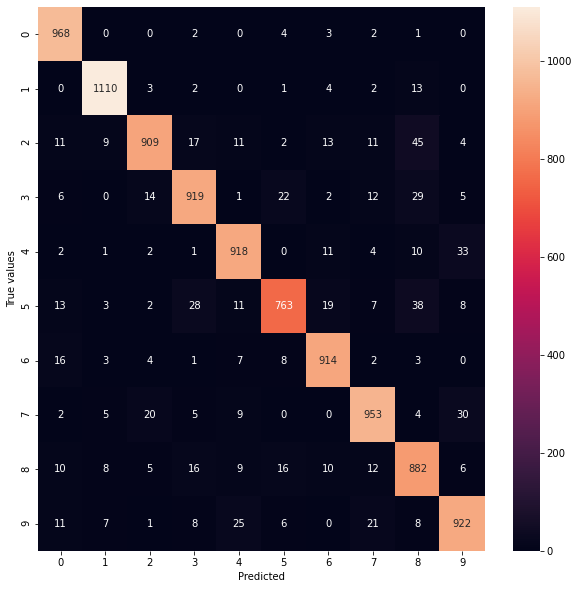

In [68]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True values")

diagonals are correct prediction while all the values other than our diagonal are errors

### Adding a hidden layer

In [69]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2768 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1263 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0879 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0526 - accuracy: 0.9843


In [70]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.0823 - accuracy: 0.9753


[0.08232611417770386, 0.9753000140190125]

In [71]:
y_pred=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_pred]
y_predicted_labels
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'True values')

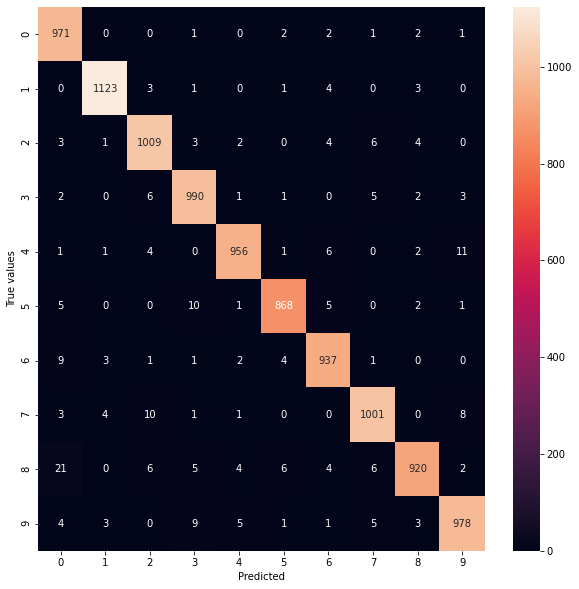

In [72]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True values")